In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from PIL import Image, ImageDraw, ImageFont
from os import listdir
%matplotlib inline

In [2]:
sns.set_style(style="whitegrid")

In [3]:
train_filenames = listdir('../data/original/train_images/')

In [4]:
len(train_filenames)

3605

3605 pages of training data. Many characters on each page.

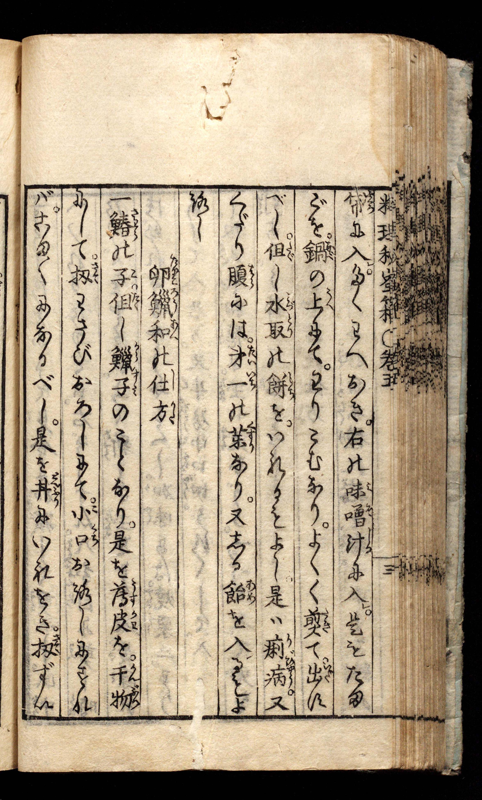

In [5]:
img_try = Image.open(f'../data/original/train_images/{train_filenames[0]}')
img_try.thumbnail((800,800))
img_try

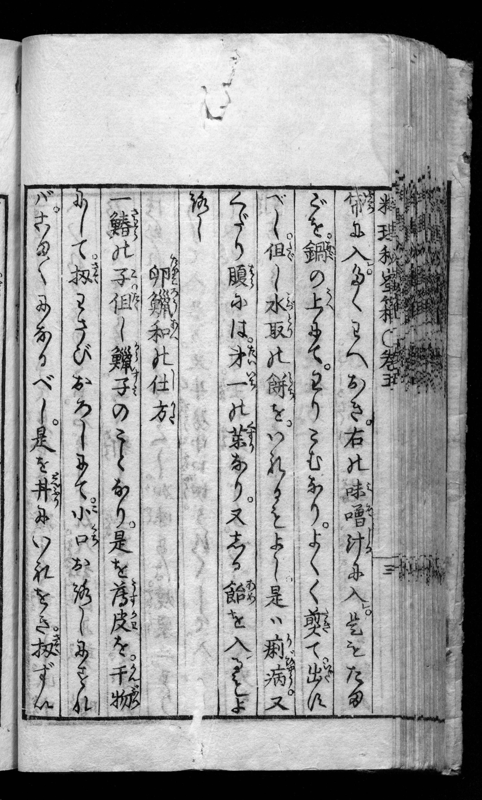

In [6]:
img_try.convert(mode='L')

In [7]:
train_sizes = []
for fp in train_filenames:
    img = Image.open(f'../data/original/train_images/{fp}')
    train_sizes.append(img.size)

In [8]:
xs = [size[0] for size in train_sizes]
ys = [size[1] for size in train_sizes]

# plt.figure(figsize=(15,8))
# plt.scatter(xs, ys)
# plt.title('Page Sizes')
# plt.xlabel('X Size (Pixels)')
# plt.ylabel('y Size (pixels)')

<AxesSubplot:>

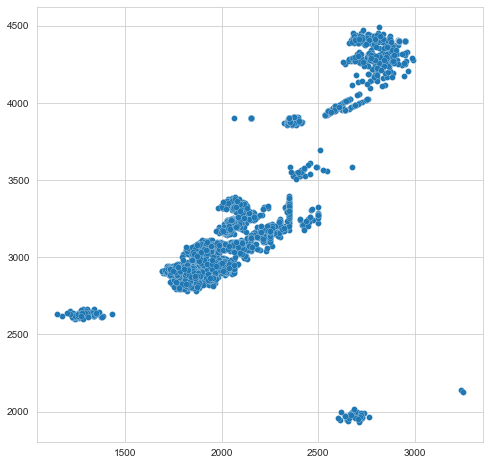

In [9]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=xs, y=ys,
                palette="ch:r=-.2,d=.3_r",
                linewidth=0.2)

In [10]:
labels = pd.read_csv('../data/original/train.csv')

In [11]:
labels.head()

,image_id,labels
0,100241706_00004_2,U+306F 1231 3465 133 53 U+304C 275 1652 84 69 ...
1,100241706_00005_1,U+306F 1087 2018 103 65 U+304B 1456 1832 40 73...
2,100241706_00005_2,U+306F 572 1376 125 57 U+306E 1551 2080 69 68 ...
3,100241706_00006_1,U+3082 1455 3009 65 44 U+516B 1654 1528 141 75...
4,100241706_00007_2,U+309D 1201 2949 27 33 U+309D 1196 1539 27 36 ...


In [12]:
total_labels = []
for label in labels['labels']:
    tokens = np.array(label.split(' ')).reshape(-1, 5)
    chars = np.array([token[0] for token in tokens]).reshape(-1)
    total_labels += list(chars)

In [13]:
len(total_labels)

683464

In [18]:
len(set(total_labels))

4212

In [19]:
with open('../data/extracted_train/train_df.txt', 'rb') as fp:
    train_df = pickle.load(fp)
train_df.columns = ['img', 'unicode']

In [20]:
conversion = pd.read_csv('../data/original/unicode_translation.csv')
conversion.columns=['unicode', 'char']
conversion.head()

,unicode,char
0,U+0031,1
1,U+0032,2
2,U+0034,4
3,U+0036,6
4,U+0039,9


In [21]:
train_df = train_df.set_index('unicode').join(conversion.set_index('unicode')).reset_index()

In [22]:
train_df.head()

,unicode,img,char
0,U+003F,<PIL.Image.Image image mode=L size=118x149 at ...,?
1,U+2000B,<PIL.Image.Image image mode=L size=99x108 at 0...,𠀋
2,U+2000B,<PIL.Image.Image image mode=L size=96x113 at 0...,𠀋
3,U+2000B,<PIL.Image.Image image mode=L size=105x134 at ...,𠀋
4,U+2000B,<PIL.Image.Image image mode=L size=100x110 at ...,𠀋


<Figure size 1800x720 with 0 Axes>

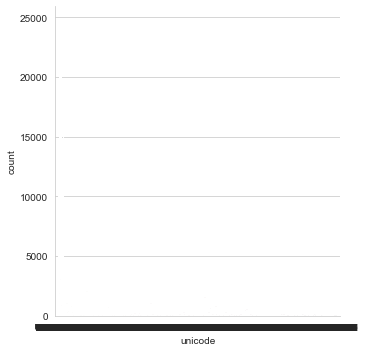

In [23]:
plt.figure(figsize=(25,10))
# plt.hist(total_labels, bins=20)
# plt.xlabel('Character')
# plt.ylabel('Count')
# plt.title('Character Frequencies in Training Data')
sns.catplot(x='unicode', kind='count', palette="ch:.25", data=train_df.reset_index())

In [24]:
train_char_counts = pd.Series(total_labels)

In [25]:
train_char_counts.head()

0    U+306F
1    U+304C
2    U+3044
3    U+3051
4    U+306B
dtype: object

In [26]:
train_char_counts = pd.DataFrame(train_char_counts.value_counts()).reset_index()
train_char_counts.columns = ['unicode', 'count']

In [27]:
train_char_counts

,unicode,count
0,U+306B,24685
1,U+306E,24136
2,U+3057,22209
3,U+3066,20569
4,U+3068,16588
...,...,...
4207,U+30DA,1
4208,U+8114,1
4209,U+71FC,1
4210,U+722C,1


In [28]:
train_char_counts = train_char_counts.set_index('unicode').join(conversion.set_index('unicode'))

In [29]:
train_char_counts.sort_values('count', ascending=False, inplace=True)

In [30]:
train_char_counts.head()

,count,char
unicode,,
U+306B,24685,に
U+306E,24136,の
U+3057,22209,し
U+3066,20569,て
U+3068,16588,と


(array([486585.,  35751.,  33338.,  24431.,  21208.,  20963.,  17637.,
         14220.,  17289.,  12042.]),
 array([   0. ,  421.1,  842.2, 1263.3, 1684.4, 2105.5, 2526.6, 2947.7,
        3368.8, 3789.9, 4211. ]),
 <BarContainer object of 10 artists>)

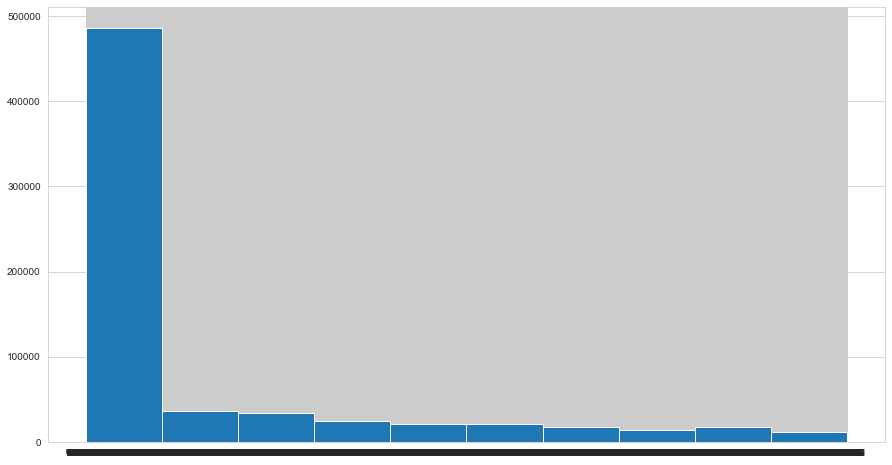

In [31]:
plt.figure(figsize=(15,8))
plt.hist(train_df.reset_index()['unicode'])

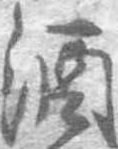

In [32]:
train_df['img'][0]

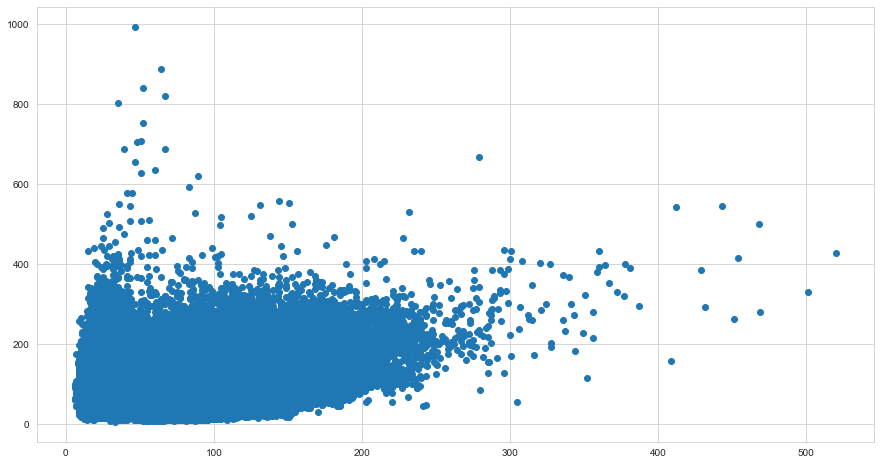

In [33]:
xs = [img.size[0] for img in train_df['img']]
ys = [img.size[1] for img in train_df['img']]

plt.figure(figsize=(15,8))
plt.scatter(xs, ys)

Text(0, 0.5, 'Frequency')

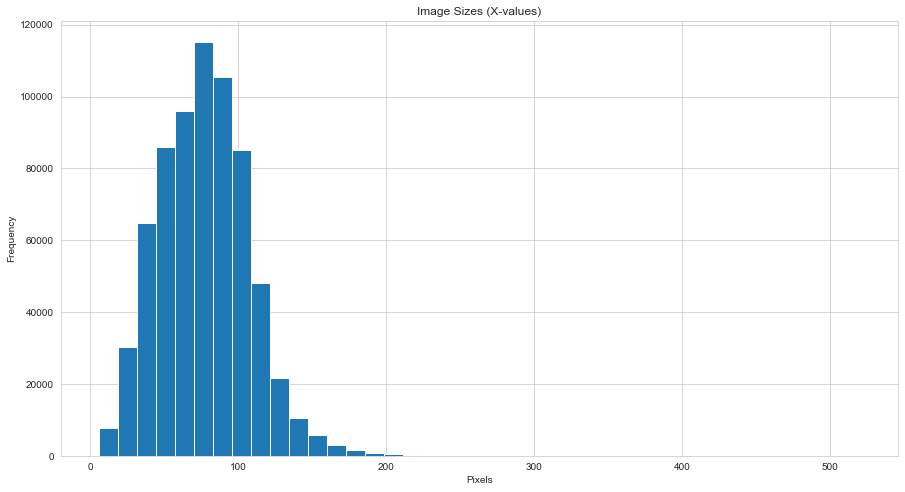

In [34]:
plt.figure(figsize=(15,8))
plt.hist(xs, bins=40)
plt.title('Image Sizes (X-values)')
plt.xlabel('Pixels')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

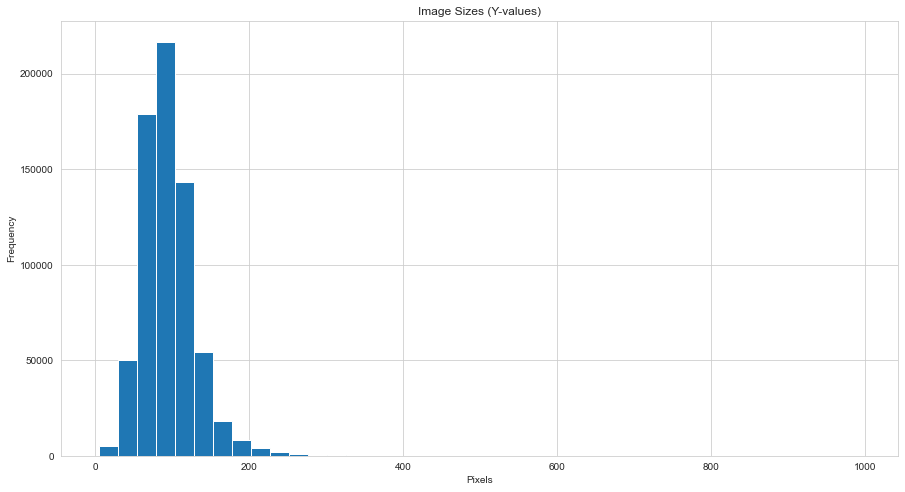

In [35]:
plt.figure(figsize=(15,8))
plt.hist(ys, bins=40)
plt.title('Image Sizes (Y-values)')
plt.xlabel('Pixels')
plt.ylabel('Frequency')

In [55]:
train_df[train_df['char']=='一']['img'][452795]

In [56]:
train_df[train_df['char']=='一']['img'][452795].size

(105, 17)

In [66]:
train_df.set_index('unicode', inplace=True)

In [67]:
train_df['rel_freq'] = train_df.groupby(['unicode']).count()['char']/len(train_df)

{'U+003F': ['U+003F'], 'U+2000B': ['U+2000B', 'U+2000B', 'U+2000B', 'U+2000B', 'U+2000B', 'U+2000B', 'U+2000B', 'U+2000B', 'U+2000B'], 'U+20D45': ['U+20D45', 'U+20D45', 'U+20D45', 'U+20D45', 'U+20D45', 'U+20D45', 'U+20D45', 'U+20D45', 'U+20D45'], 'U+2123D': ['U+2123D'], 'U+22999': ['U+22999', 'U+22999', 'U+22999', 'U+22999'], 'U+22CE3': ['U+22CE3'], 'U+231C3': ['U+231C3'], 'U+2324A': ['U+2324A'], 'U+233D0': ['U+233D0'], 'U+23D0E': ['U+23D0E'], 'U+241C6': ['U+241C6', 'U+241C6'], 'U+242CE': ['U+242CE', 'U+242CE'], 'U+2437D': ['U+2437D'], 'U+24E60': ['U+24E60'], 'U+24FA3': ['U+24FA3', 'U+24FA3'], 'U+25750': ['U+25750'], 'U+25877': ['U+25877', 'U+25877', 'U+25877', 'U+25877'], 'U+25A0': ['U+25A0', 'U+25A0', 'U+25A0', 'U+25A0', 'U+25A0', 'U+25A0', 'U+25A0', 'U+25A0', 'U+25A0', 'U+25A0', 'U+25A0', 'U+25A0', 'U+25A0', 'U+25A0', 'U+25A0', 'U+25A0'], 'U+25A1': ['U+25A1'], 'U+25B2': ['U+25B2', 'U+25B2', 'U+25B2', 'U+25B2', 'U+25B2', 'U+25B2', 'U+25B2', 'U+25B2', 'U+25B2', 'U+25B2', 'U+25B2', 'U+

In [86]:
counts = pd.DataFrame(pd.Series(total_labels).value_counts(normalize=True))

In [88]:
counts.columns=['rel_freq']

/Users/stlanier/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


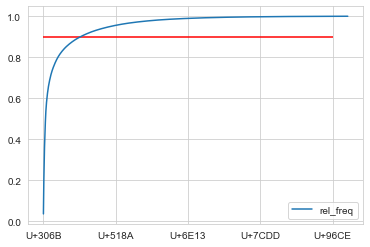

In [101]:
counts.sort_values('rel_freq', ascending=False).cumsum().plot()
plt.hlines(0.9, xmin=0, xmax=4000, color='red')

In [102]:
len(counts[counts.cumsum()['rel_freq'] <= 0.9])

513

In [105]:
counts[round(counts.cumsum(), 2)['rel_freq'] == 0.9]

,rel_freq
U+5B89,0.000193
U+56F3,0.000193
U+6DF1,0.000193
U+9162,0.000192
U+8150,0.000192
U+7BED,0.000192
U+5438,0.000190
U+5439,0.000190
U+756A,0.000190
U+52A9,0.000189


In [106]:
pd.Series(total_labels).value_counts()['U+62BC']

117

In [113]:
train_df.reset_index()[train_df.reset_index()['unicode']=='U+62BC']

,unicode,img,char,rel_freq
564578,U+62BC,<PIL.Image.Image image mode=L size=118x106 at ...,押,0.000171
564579,U+62BC,<PIL.Image.Image image mode=L size=171x173 at ...,押,0.000171
564580,U+62BC,<PIL.Image.Image image mode=L size=84x86 at 0x...,押,0.000171
564581,U+62BC,<PIL.Image.Image image mode=L size=111x93 at 0...,押,0.000171
564582,U+62BC,<PIL.Image.Image image mode=L size=106x105 at ...,押,0.000171
...,...,...,...,...
564690,U+62BC,<PIL.Image.Image image mode=L size=109x115 at ...,押,0.000171
564691,U+62BC,<PIL.Image.Image image mode=L size=99x99 at 0x...,押,0.000171
564692,U+62BC,<PIL.Image.Image image mode=L size=109x115 at ...,押,0.000171
564693,U+62BC,<PIL.Image.Image image mode=L size=101x123 at ...,押,0.000171
